# Exploration of Images HoloSPEC test Bench
================================================================

- date of creation : Friday November 23th 2018
- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS

Study images for LSST calibration group

In [496]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
#config InlineBackend.rc = {}
#config Backend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")  # default config obtained from astropy examples
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.colors import LogNorm

In [497]:
from astropy.utils.data import download_file

In [498]:
from astropy.io import fits

In [499]:
import os

In [500]:
NBCHAN=16
jet =plt.get_cmap('jet')    
cNorm  = colors.Normalize(vmin=0, vmax=NBCHAN)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors= scalarMap.to_rgba(np.arange(NBCHAN),alpha=1)
#colorVal = scalarMap.to_rgba(num,alpha=1)

## 1) to define the input file for the images

In [501]:
path='../data/20181025/'

In [502]:
filename='10_CCD1_20181025173846.fz'

In [503]:
!ls

10_CCD1_20181025173846_ovsc.fz libHOLOSPECImages.pyc
ExploreImageBorders.ipynb      libMonocamBaseImages.py
HOLOSPECReduction.ipynb        libMonocamBaseImages.pyc
ImageAssembler.ipynb           runOverscan.py
ShowFileInDS9.ipynb            test.fits
libHOLOSPECImages.py           test.py


In [504]:
path='.'
filename='10_CCD1_20181025173846_ovsc.fz'

In [505]:
image_file=os.path.join(path,filename)

## 2) to inspect the header of the file

In [506]:
header=fits.getheader(image_file) # to retreive the header of the file
fits.getheader(image_file)
#print header
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DETSIZE = '[1:4096,1:4004]'    / NOAO MOSAIC keywords                           
WIDTH   =                  576 / CCD columns per channel                        
HEIGHT  =                 2048 / CCD lines per channel                          
ORIGIN  = 'LPNHE   '           / Which site acquired the data                   
DATE-OBS= '2018-10-25T15:38:45.633071' / Date of the observation, UTC           
TSTAND  = 'ISO7    '           / Which Test stand at the site was used          
INSTRUME= 'REB5    '           / CCD Controller type                            
CONTROLL= 'REB5    '           / Duplicates INSTRUME                            
CTRL_SYS= 'CCD_REB '        

In [507]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: ./10_CCD1_20181025173846_ovsc.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1                1 ImageHDU        39   (485, 1968)   float64   
  2                1 ImageHDU        39   (485, 1968)   float64   
  3                1 ImageHDU        39   (485, 1968)   float64   
  4                1 ImageHDU        39   (485, 1968)   float64   
  5                1 ImageHDU        39   (485, 1968)   float64   
  6                1 ImageHDU        39   (485, 1968)   float64   
  7                1 ImageHDU        39   (485, 1968)   float64   
  8                1 ImageHDU        39   (485, 1968)   float64   
  9                1 ImageHDU        39   (485, 1968)   float64   
 10                1 ImageHDU        39   (485, 1968)   float64   
 11                1 ImageHDU        39   (485, 1968)   float64   
 12                1 ImageHDU        39   (485, 1968)   float64   
 13                1 ImageHDU        39 

## 3) A view of the header

In [508]:
header=hdu_list[0].header
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DETSIZE = '[1:4096,1:4004]'    / NOAO MOSAIC keywords                           
WIDTH   =                  576 / CCD columns per channel                        
HEIGHT  =                 2048 / CCD lines per channel                          
ORIGIN  = 'LPNHE   '           / Which site acquired the data                   
DATE-OBS= '2018-10-25T15:38:45.633071' / Date of the observation, UTC           
TSTAND  = 'ISO7    '           / Which Test stand at the site was used          
INSTRUME= 'REB5    '           / CCD Controller type                            
CONTROLL= 'REB5    '           / Duplicates INSTRUME                            
CTRL_SYS= 'CCD_REB '        

#### 3.3) extract the time

In [509]:
import pandas as pd
from datetime import datetime, timedelta
from pytz import timezone
import pytz

In [510]:
timestr=header['DATE']
print timestr  # I don't know what to to from the .XXX after the second number
tzstr=timestr.split('.')[0]  # cut away the dot
print tzstr
datetime.strptime(tzstr, "%Y-%m-%dT%H:%M:%S")

2018-10-25T15:38:59.680071
2018-10-25T15:38:59


datetime.datetime(2018, 10, 25, 15, 38, 59)

## 4) read one amplifier

In [511]:
numchan=1

In [512]:
image_data = hdu_list[numchan].data

In [513]:
image_data.shape

(1968, 485)

In [514]:

# better not to close the file here
#hdu_list.close() 

#### another way to read the image
But it is not interesting because it does not select the channel number

In [515]:
image_data = fits.getdata(image_file)
image_data_flat=image_data.flatten()
print(type(image_data))
print(image_data.shape)
themin=image_data.min()
themax=image_data.max()
print(themin,themax)

<type 'numpy.ndarray'>
(1968, 485)
(48245.200169656484, 63415.23790120409)


In [516]:
def ShowImagesSet(path,filename):
    '''
    Shows the whole set of CCD images
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
    image_file=os.path.join(path,filename) # make the full filename    
    hdu_list = fits.open(image_file)       # open the file
    #hdu_list.info()	 # to know the composition of the files (header+images)		
    header=hdu_list[0].header           # retrieve the header
    number_of_channels=NBCHAN   # number of channels in the CCD
    
    NX=8 # number of images along the horizontal axis
    NY=2 # number of images along the vertical axis
    f, axarr = plt.subplots(NY,NX,sharex='col', sharey='row',figsize=(15,15)) # figure organisation
    #f, axarr = plt.subplots(NX,NY,sharex=True, sharey=True,figsize=(20,20))
    f.subplots_adjust(hspace=0.05,wspace=0.05)

    for index in range(0,number_of_channels,1):  
        ix=index%8
        iy=index/8
        image_data = hdu_list[index+1].data
        #im=axarr[iy,ix].imshow(image_data, norm=LogNorm(),vmin=image_data.min(),vmax=image_data.max(),cmap='jet')  # plot the image
        im=axarr[iy,ix].imshow(image_data,origin='lower',vmin=image_data.min(),vmax=image_data.max(),cmap='jet')  # plot the image
        if ix==0 and iy==0:
            im0=im
        plottitle='channel {}'.format(index+1)
        axarr[iy,ix].set_title(plottitle)
    hdu_list.close()
    #plt.colorbar(im, orientation='horizontal')
    title='ADU map file {} '.format(filename)
    cax = f.add_axes([0.95, 0.12, 0.03, 0.78]) # [left,bottom,width,height]    
    f.colorbar(im0, cax=cax)
    f.suptitle(title,size=16)

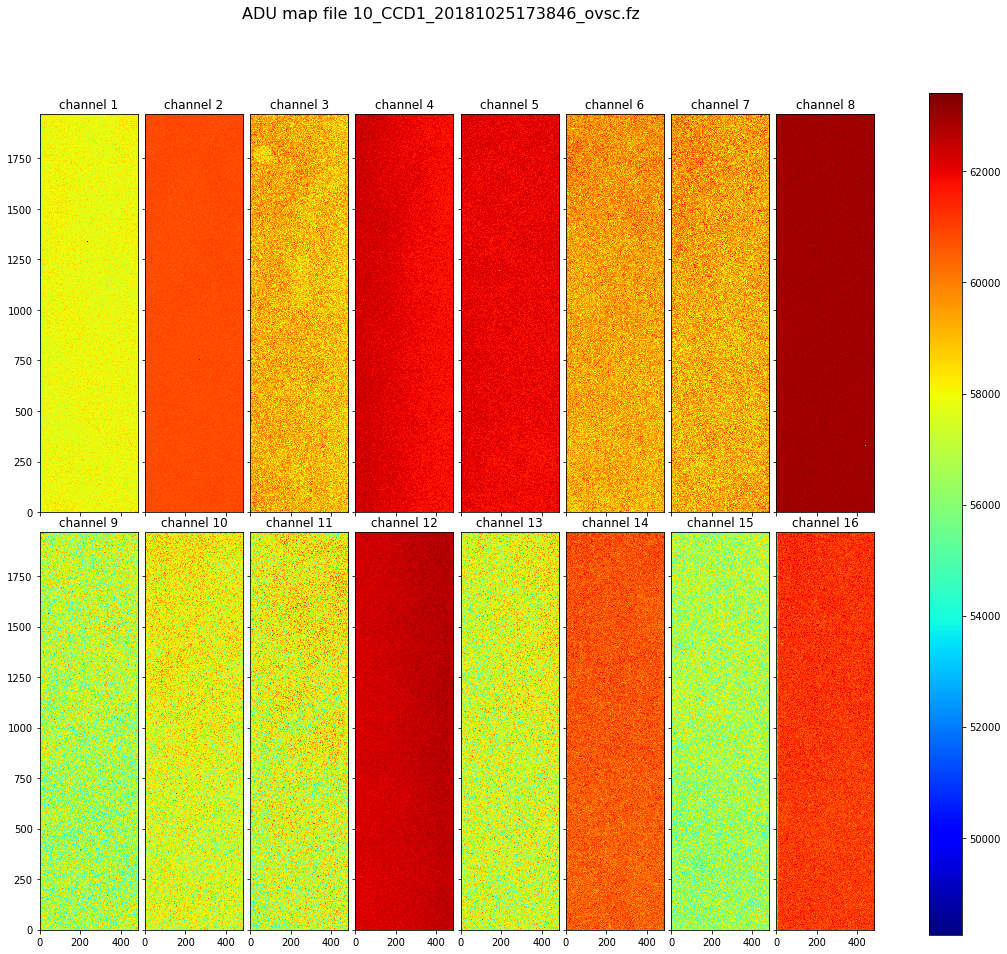

In [517]:
ShowImagesSet(path,filename)

In [518]:
def ShowHistoSet(path,filename):
    '''
    Shows the whole set of CCD histograms
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
    image_file=os.path.join(path,filename) # make the full filename    
    hdu_list = fits.open(image_file)       # open the file
    #hdu_list.info()	 # to know the composition of the files (header+images)		
    header=hdu_list[0].header           # retrieve the header
    number_of_channels=NBCHAN   # number of channels in the CCD
    
    NX=4 # number of images along the horizontal axis
    NY=4 # number of images along the vertical axis
    f, axarr = plt.subplots(NY,NX,figsize=(20,20)) # figure organisation
    #f, axarr = plt.subplots(NX,NY,sharex=True, sharey=True,figsize=(20,20))
    f.subplots_adjust(hspace=0.5,wspace=0.5)

    for index in range(0,number_of_channels,1):  
        ix=index%4
        iy=index/4
        colorVal = scalarMap.to_rgba(index,alpha=1)
        image_data = hdu_list[index+1].data
        data=image_data.flatten()
        axarr[iy,ix].hist(data,bins=500,facecolor=colorVal, alpha=0.75,log=True)  # plot the image
        plottitle='channel {}'.format(index+1)
        axarr[iy,ix].set_title(plottitle)
        axarr[iy,ix].set_xlabel('ADU')
        axarr[iy,ix].grid(True)
        #axarr[iy,ix].set_yscale('log')
        
    hdu_list.close()
    plt.yscale('log')
    title='ADU values for file {} '.format(filename)
    plt.suptitle(title,size=16)

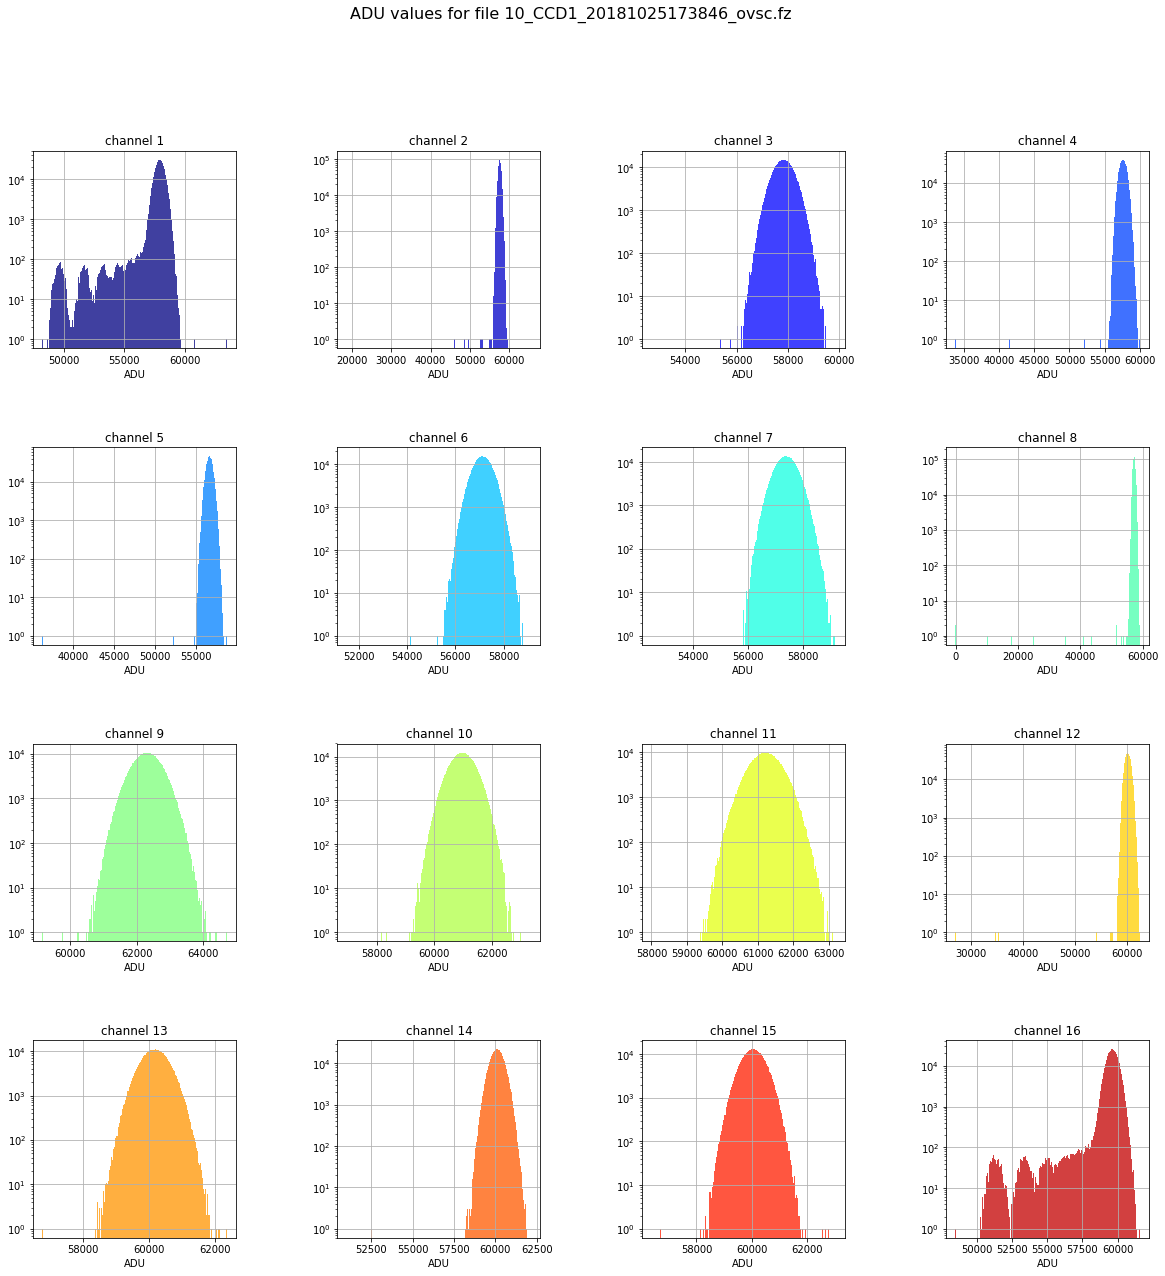

In [519]:
ShowHistoSet(path,filename)

## Show the horizontal and vertical profiles of the flats

In [520]:
def ShowHistoSetAxis(path,filename,ax=0):
    '''
    Shows the whole set of CCD histograms
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
    image_file=os.path.join(path,filename) # make the full filename    
    hdu_list = fits.open(image_file)       # open the file
    #hdu_list.info()	 # to know the composition of the files (header+images)		
    header=hdu_list[0].header           # retrieve the header
    number_of_channels=NBCHAN   # number of channels in the CCD
    
    NX=4 # number of images along the horizontal axis
    NY=4 # number of images along the vertical axis
    f, axarr = plt.subplots(NY,NX,figsize=(20,20)) # figure organisation
    #f, axarr = plt.subplots(NX,NY,sharex=True, sharey=True,figsize=(20,20))
    f.subplots_adjust(hspace=0.5,wspace=0.5)

    for index in range(0,number_of_channels,1):  
        ix=index%4
        iy=index/4
        colorVal = scalarMap.to_rgba(index,alpha=1)
        image_data = hdu_list[index+1].data
        data=np.mean(image_data,axis=ax)
        axarr[iy,ix].plot(data,'-',color=colorVal)  # plot the image
        plottitle='channel {}'.format(index+1)
        axarr[iy,ix].set_title(plottitle)
        axarr[iy,ix].set_xlabel('pixel id')
        axarr[iy,ix].grid(True)
        #axarr[iy,ix].set_yscale('log')
        
    hdu_list.close()
    #plt.yscale('log')
    title='Flat for flat file {} axis {} '.format(filename,ax)
    plt.suptitle(title,size=16)

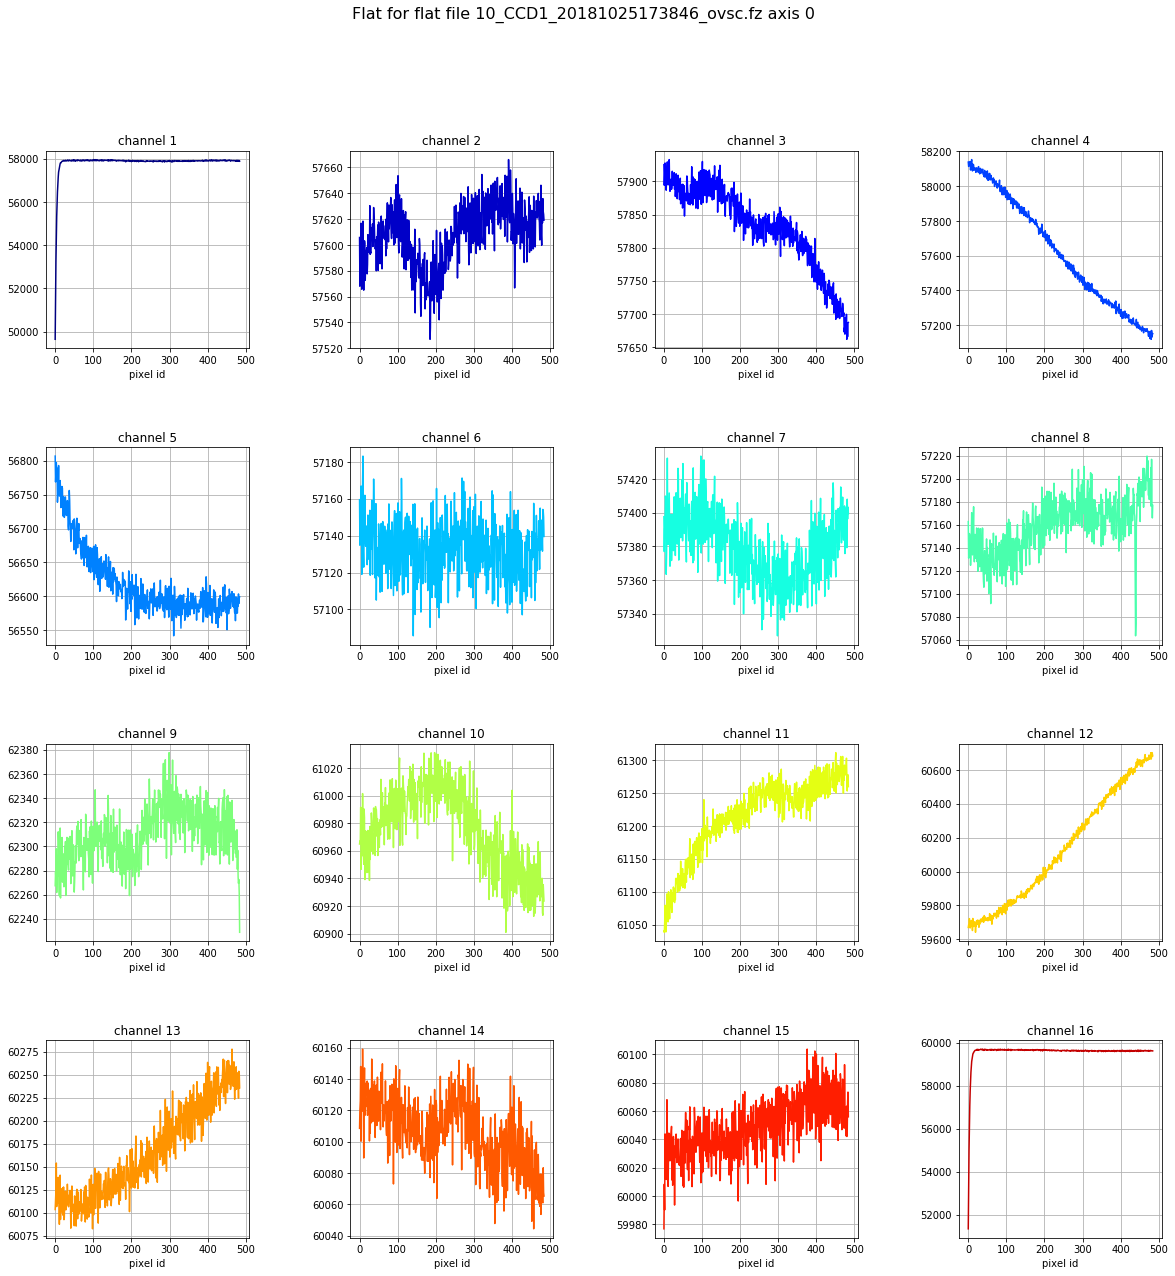

In [521]:
ShowHistoSetAxis(path,filename)

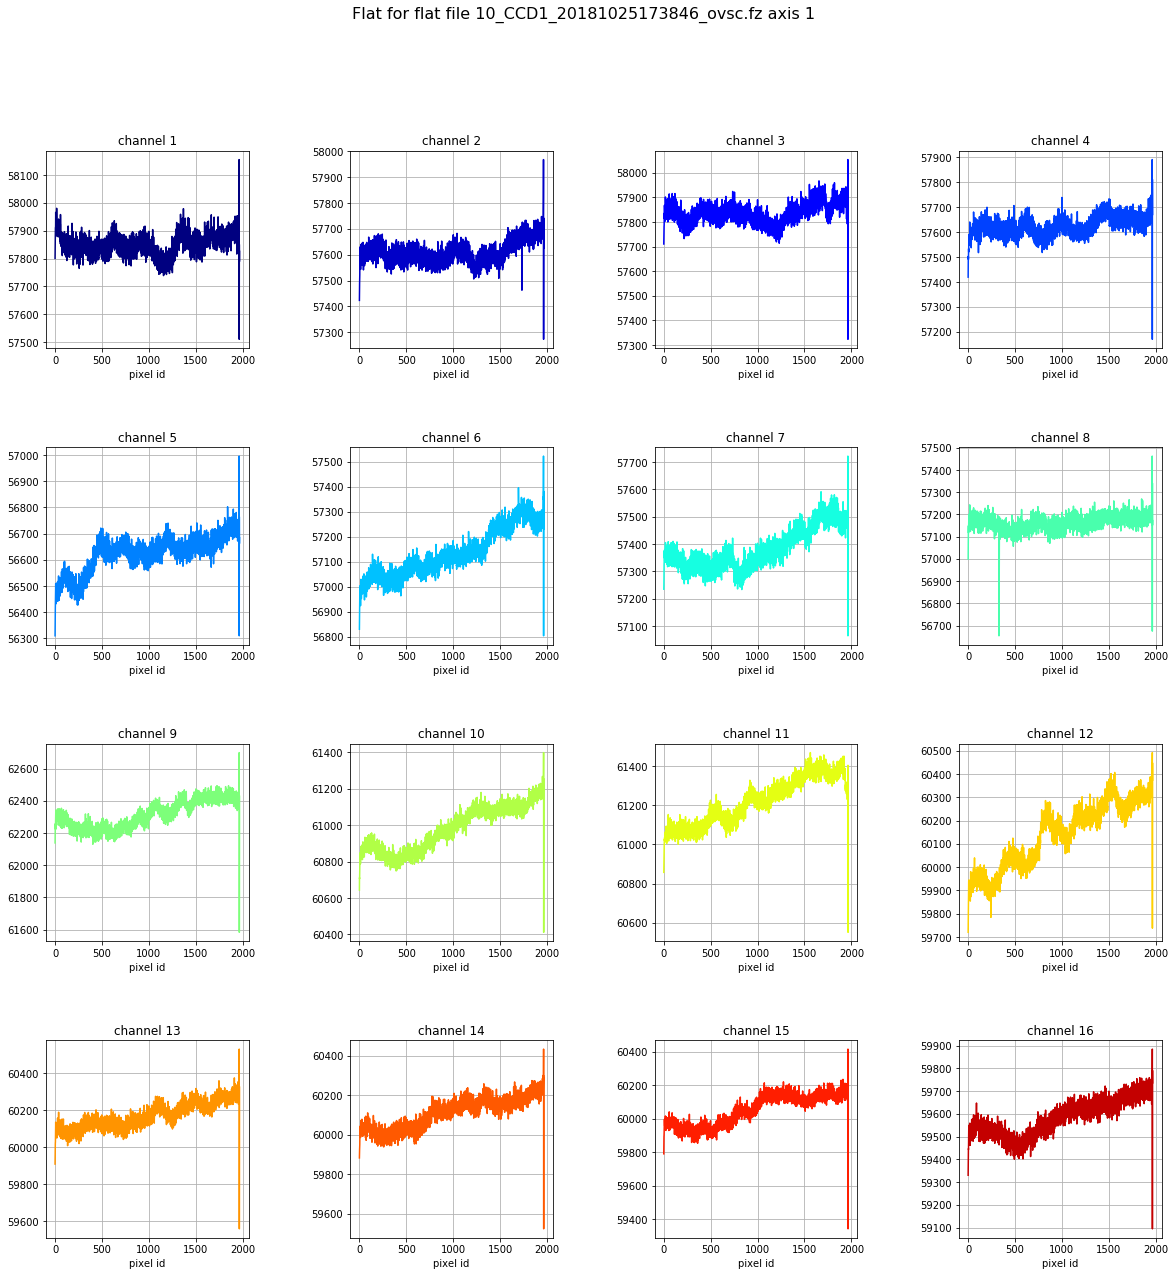

In [522]:
ShowHistoSetAxis(path,filename,ax=1)

In [523]:
def ShowHistoSumAxis(path,filename,ax=0):
    '''
    Shows the whole set of CCD histograms
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
    image_file=os.path.join(path,filename) # make the full filename    
    hdu_list = fits.open(image_file)       # open the file
    #hdu_list.info()	 # to know the composition of the files (header+images)		
    header=hdu_list[0].header           # retrieve the header
    number_of_channels=NBCHAN   # number of channels in the CCD
    
    NX=1 # number of images along the horizontal axis
    NY=1 # number of images along the vertical axis
    f, axarr = plt.subplots(NY,NX,figsize=(20,6)) # figure organisation

    for index in range(0,number_of_channels,1):  
        
        image_data = hdu_list[index+1].data
        data=np.mean(image_data,axis=ax)
        min=data.min()
        max=data.max()
        colorVal = scalarMap.to_rgba(index,alpha=1)
        plabel='channel {}'.format(index+1)
        plt.plot(np.arange(data.shape[0]),data,color=colorVal,label=plabel)  # plot the image
    
    if ax == 0:
        plt.xticks(np.arange(0, data.shape[0]+1, 10.))
    else:
        plt.xticks(np.arange(0, data.shape[0]+1, 50.))
    hdu_list.close()
    plt.legend(loc='best')
    title='Flat for flat file {} axis {} '.format(filename,ax)
    plt.grid()
    plt.suptitle(title,size=16)

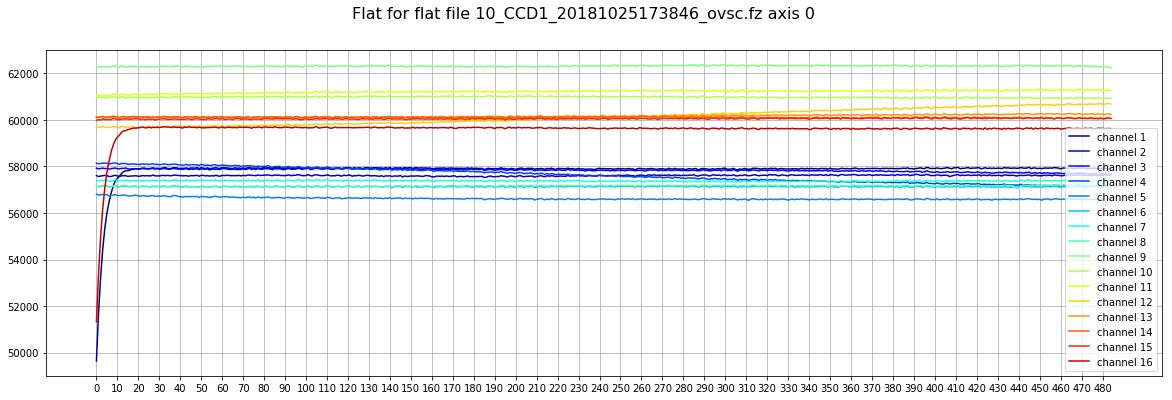

In [524]:
ShowHistoSumAxis(path,filename)

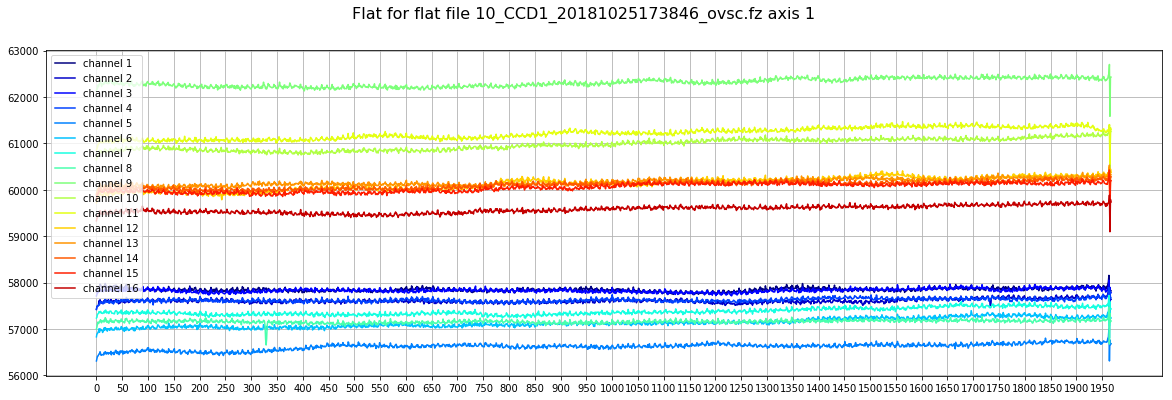

In [525]:
ShowHistoSumAxis(path,filename,ax=1)

### Conclusion on Trimsec and biasec

I have compared this matplotlib and ds9.

- here we consider averages of values along vertical and horizontal axis
- In DS9 we can see the transition between a trim and a bias sectionat a given position (X,Y)

The image is vertically flipped between matplotlib and DS9 (Y flip)

I suggest the following  definition of Trimsec and biassec in numpy definitions

- Trimsec: [0:2000,10:520]
- Biassec: [0:2000,521:576]


